In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from pylab import rcParams
rcParams['figure.figsize']=12,7

In [ ]:
df = pd.read_csv('/content/monthly_milk_production.csv')

In [ ]:
df.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [ ]:
df.tail()

,Date,Production
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797
167,1975-12,843


In [ ]:
df.columns = ['Month','Milk/cow']
df.head()


,Month,Milk/cow
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [ ]:
df.dtypes

Month       object
Milk/cow     int64
dtype: object

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isna().sum()

Month       0
Milk/cow    0
dtype: int64

In [ ]:
#df.drop(168,axis=0,inplace=True)

KeyError: ignored

In [ ]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,Milk/cow
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [ ]:
df

,Month,Milk/cow
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727
...,...,...
163,1975-08-01,858
164,1975-09-01,817
165,1975-10-01,827
166,1975-11-01,797


In [ ]:
df.set_index('Month',inplace=True)

In [ ]:
df.head()

,Milk/cow
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [ ]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

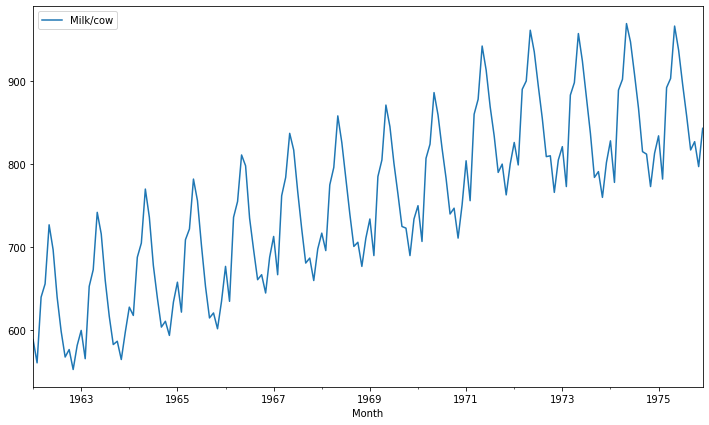

In [ ]:
df.plot()

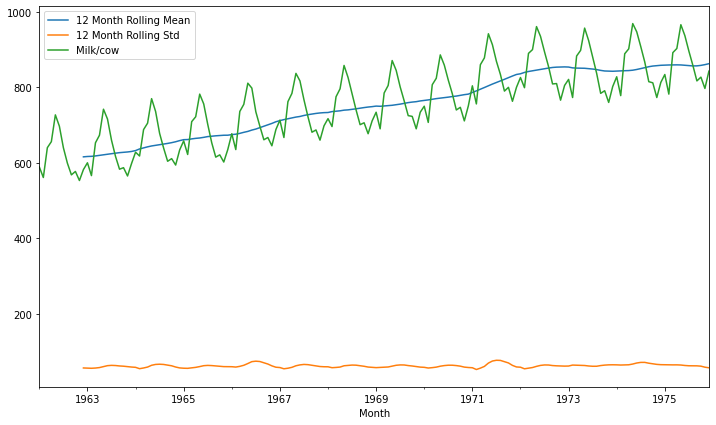

In [ ]:
#checking for rolling test
timeseries = df['Milk/cow']
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend(loc='best')
#plot likes there is a incresing trend in the data

<Figure size 864x504 with 0 Axes>

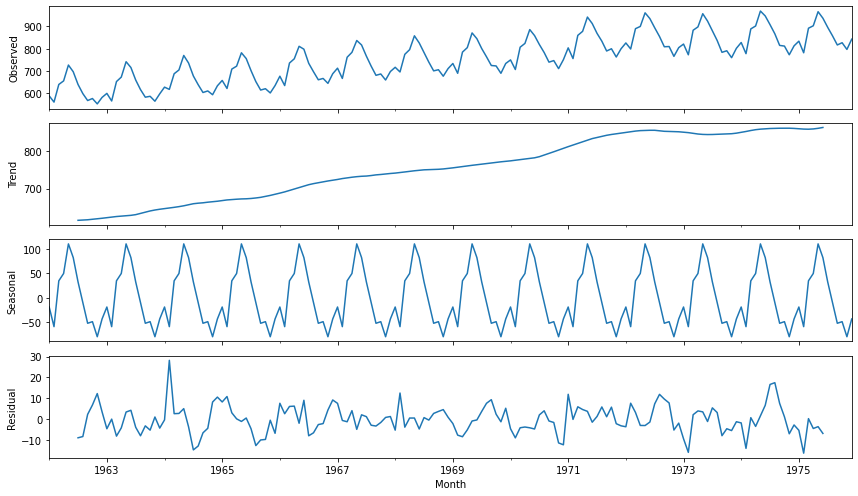

In [ ]:
#will decompose to individual parts
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Milk/cow'])  
fig = plt.figure()  
fig = decomposition.plot()  


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(timeseries)
result

(-1.3038115874221246,
 0.627426708603034,
 13,
 154,
 {'1%': -3.473542528196209,
  '10%': -2.576878053634677,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [ ]:
#Mathematically testing stationarity by agumented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
#Creating function for later use
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [ ]:
#Check if the time series is Stationary or Not.
adf_check(df['Milk/cow'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3038115874221246
p-value : 0.627426708603034
#Lags Used : 13
Number of Observations Used : 154
weak evidence against null hypothesis, time series is non-stationary 


In [ ]:
df['Milk/cow'].shift(1)

Month
1962-01-01      NaN
1962-02-01    589.0
1962-03-01    561.0
1962-04-01    640.0
1962-05-01    656.0
              ...  
1975-08-01    896.0
1975-09-01    858.0
1975-10-01    817.0
1975-11-01    827.0
1975-12-01    797.0
Name: Milk/cow, Length: 168, dtype: float64

In [ ]:
df['Milk First Difference'] = df['Milk/cow'] - df['Milk/cow'].shift(1)

In [ ]:
df.head()

,Milk/cow,Milk First Difference
Month,,
1962-01-01,589,NaN
1962-02-01,561,-28.0
1962-03-01,640,79.0
1962-04-01,656,16.0
1962-05-01,727,71.0


In [ ]:
df.shape

(168, 2)

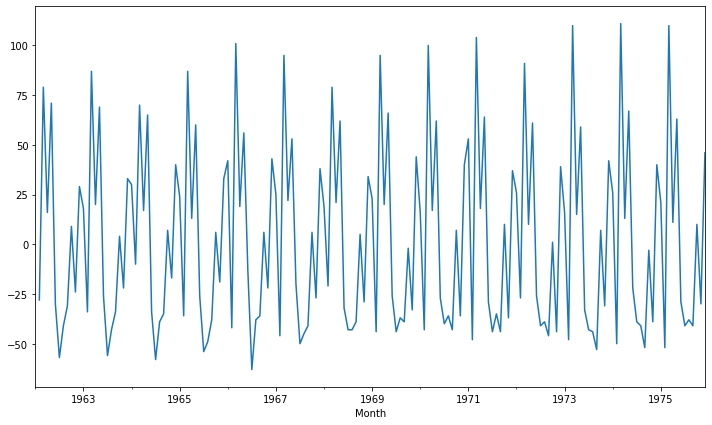

In [ ]:
df['Milk First Difference'].plot()

In [ ]:
adf_check(df['Milk First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0549955586531095
p-value : 0.0300680040017824
#Lags Used : 14
Number of Observations Used : 152
strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary


Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.335419314359397
p-value : 0.16079880527711382
#Lags Used : 12
Number of Observations Used : 143
weak evidence against null hypothesis, time series is non-stationary 


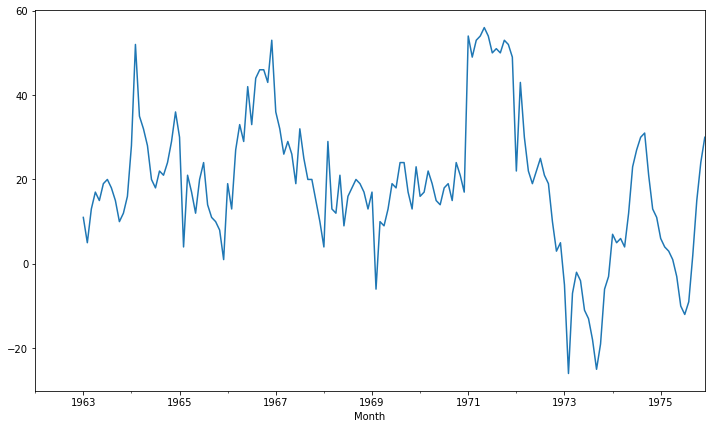

In [ ]:
#Checking Seasonal diffrence
df['Seasonal Difference'] = df['Milk/cow'] - df['Milk/cow'].shift(12)
df['Seasonal Difference'].plot()
adf_check(df['Seasonal Difference'].dropna())
#df.head(20)


In [ ]:
df

,Milk/cow,Milk First Difference,Seasonal Difference
Month,,,
1962-01-01,589,NaN,NaN
1962-02-01,561,-28.0,NaN
1962-03-01,640,79.0,NaN
1962-04-01,656,16.0,NaN
1962-05-01,727,71.0,NaN
...,...,...,...
1975-08-01,858,-38.0,-9.0
1975-09-01,817,-41.0,2.0
1975-10-01,827,10.0,15.0


In [ ]:
df.iloc[12:23,:]

,Milk/cow,Milk First Difference,Seasonal Difference
Month,,,
1963-01-01,600,18.0,11.0
1963-02-01,566,-34.0,5.0
1963-03-01,653,87.0,13.0
1963-04-01,673,20.0,17.0
1963-05-01,742,69.0,15.0
1963-06-01,716,-26.0,19.0
1963-07-01,660,-56.0,20.0
1963-08-01,617,-43.0,18.0
1963-09-01,583,-34.0,15.0


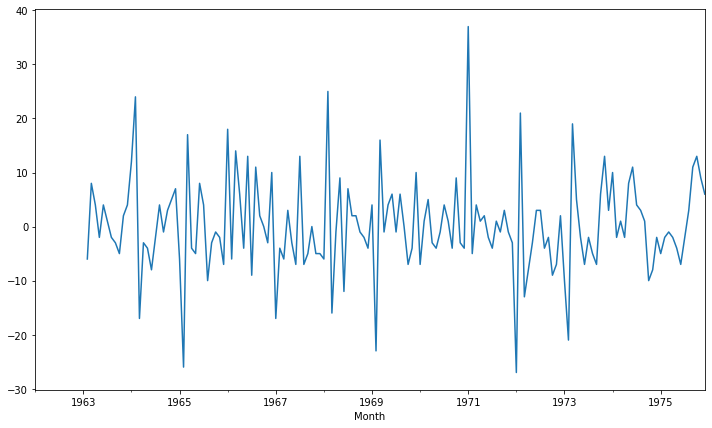

In [ ]:
#Checking for seasonal first diffrence
df['Seasonal First Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(12)
df['Seasonal First Difference'].plot()

In [ ]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.038002274921979
p-value : 1.865423431878876e-05
#Lags Used : 11
Number of Observations Used : 143
strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

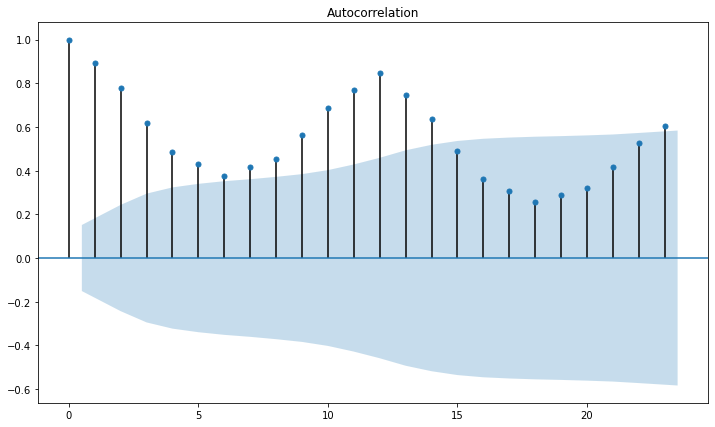

In [ ]:
plot_acf(df['Milk/cow']);

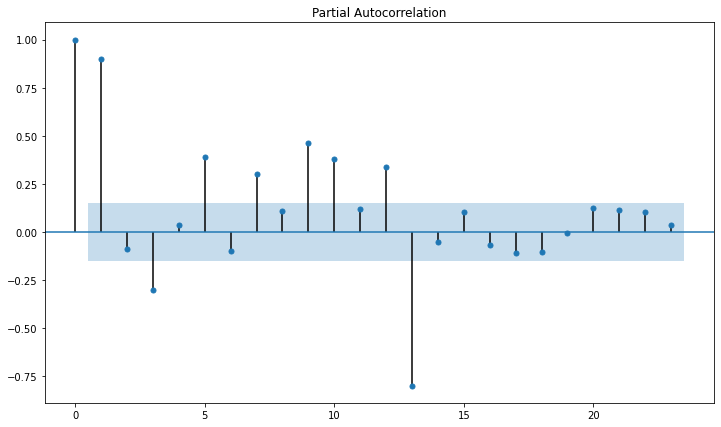

In [ ]:
plot_pacf(df['Milk/cow']);

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


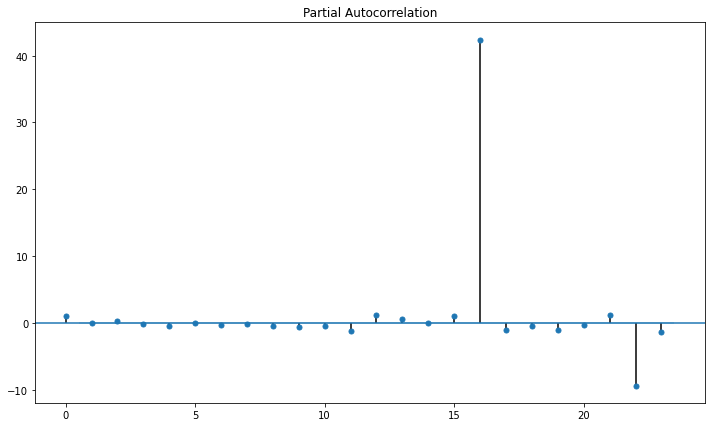

In [ ]:
fig_first = plot_pacf(df["Milk First Difference"].dropna())

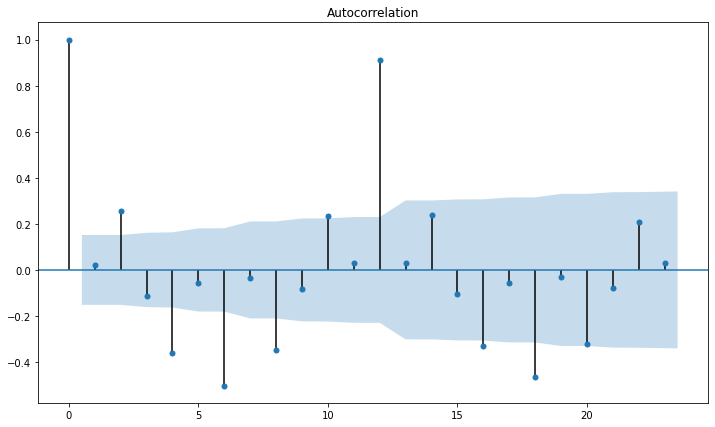

In [ ]:
fig_first = plot_acf(df["Milk First Difference"].dropna())

In [ ]:
df["Seasonal First Difference"].dropna()

Month
1963-02-01    -6.0
1963-03-01     8.0
1963-04-01     4.0
1963-05-01    -2.0
1963-06-01     4.0
              ... 
1975-08-01     3.0
1975-09-01    11.0
1975-10-01    13.0
1975-11-01     9.0
1975-12-01     6.0
Name: Seasonal First Difference, Length: 155, dtype: float64

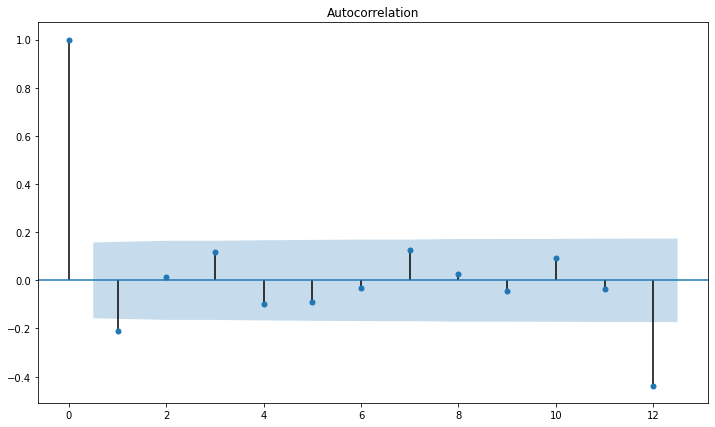

In [ ]:
fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna(),lags=12)

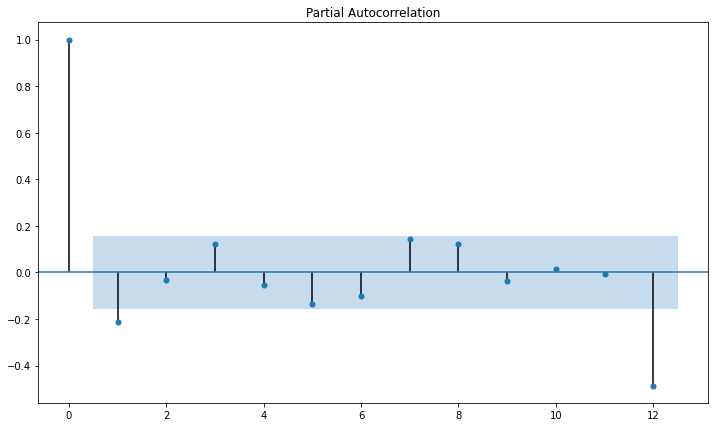

In [ ]:

fig1 =plot_pacf(df['Seasonal First Difference'].dropna(),lags=12)


In [ ]:
# We have seasonal data!
model = sm.tsa.statespace.SARIMAX(df['Milk/cow'],order=(1,1,0), seasonal_order=(1,2,1,12))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           Milk/cow   No. Observations:                  168
Model:             SARIMAX(1, 1, 0)x(1, 2, 1, 12)   Log Likelihood                -519.075
Date:                            Thu, 12 May 2022   AIC                           1046.150
Time:                                    10:46:36   BIC                           1058.002
Sample:                                01-01-1962   HQIC                          1050.966
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2370      0.070     -3.407      0.001      -0.373      -0.101
ar.S.L12      -0.4317      0.067   

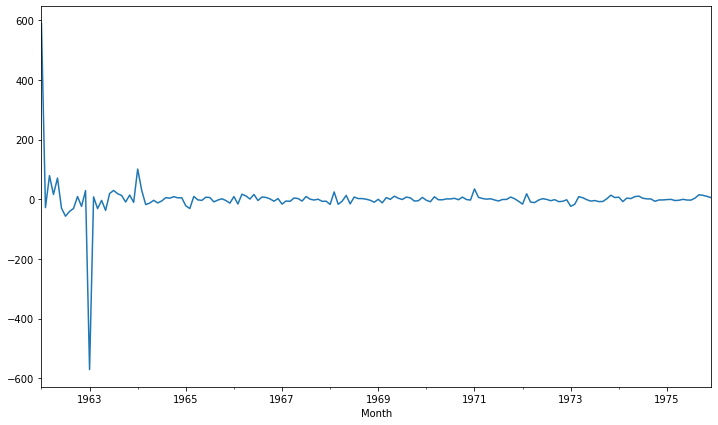

In [ ]:
results.resid.plot()

Text(0.5, 1.0, 'RMSE: 65.5124')

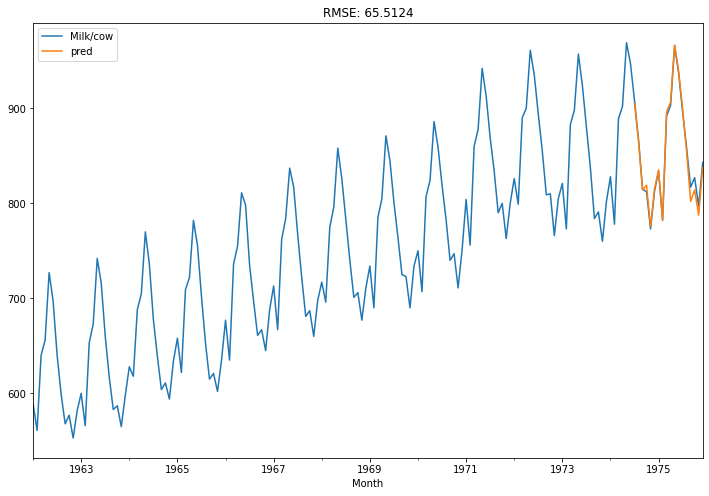

In [ ]:
df['pred'] = results.predict(start = 150, end= 200)  
df[['Milk/cow','pred']].plot(figsize=(12,8))
plt.title('RMSE: %.4f'% np.sqrt(sum((results.predict(start=0)-df['Milk/cow']).dropna()**2)/len(df)))

In [ ]:
df["pred"].count()

18

In [ ]:
df.tail()

,Milk/cow,Milk First Difference,Seasonal Difference,Seasonal First Difference,pred
Month,,,,,
1975-08-01,858,-38.0,-9.0,3.0,854.222912
1975-09-01,817,-41.0,2.0,11.0,801.978592
1975-10-01,827,10.0,15.0,13.0,814.062399
1975-11-01,797,-30.0,24.0,9.0,787.507624
1975-12-01,843,46.0,30.0,6.0,837.494638


In [ ]:
results.forecast(7)

1976-01-01     865.225203
1976-02-01     811.807037
1976-03-01     925.525194
1976-04-01     936.753235
1976-05-01    1000.762473
1976-06-01     975.004471
1976-07-01     936.749938
Freq: MS, dtype: float64

In [ ]:
import math

In [ ]:

a=((df['Milk/cow']-(df['pred'].dropna()))**2).sum()

In [ ]:
math.sqrt(a)

25.466693399989193

In [ ]:
import itertools


In [ ]:
p= d = q = range(0, 2)
p, d , q

(range(0, 2), range(0, 2), range(0, 2))

In [ ]:
pdq = list(itertools.product(p, d, q))

In [ ]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [ ]:
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [ ]:

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['Milk/cow'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            )
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2708.24576034135
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2520.5163679596853
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1452.4335716300038
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1417.909328818051
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1647.3715900474035
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1612.7713259020236
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1403.5413819653559
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1371.5657675990292
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2496.6659251585943
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2351.9693963871787
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1313.9273887136155
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1304.2129619380335
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1768.2737981692403
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2407.2409518599097
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1297.7564654524522
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1262.8204317301079
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1749.73219913295
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1593.51274563773